##Lab Task 01

In [3]:
#importing necessary libraries
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

# #imporot the patch for the google colab
from google.colab.patches import cv2_imshow

In [4]:
#specifying the folder in the google drive
folder_name = '/content/drive/MyDrive/CO543-Image Processing/Lab4/'

In [5]:
#reading two csv files from the google drive to load the csv files as pandas dataframe
training_df = pd.read_csv(folder_name +'train.csv')
testing_df = pd.read_csv(folder_name +'test.csv')

In [6]:
#checking training data frame
training_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#checking testing data frame
testing_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###Data Preprocessing

In [8]:
#since training data set has a label column, lets drop it
labels = training_df['label']
training_df.drop(['label'],axis=1, inplace=True)
training_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#defining the test and training dataframes
#training set
x_train = training_df.to_numpy()
y_train = labels.to_numpy()

#testing set
x_test = testing_df.to_numpy()

###Data Visualization

In [10]:
#checking the shapes of each set
x_train.shape, y_train.shape

((42000, 784), (42000,))

There are 42000 data records(images) and each image has 784 pixels

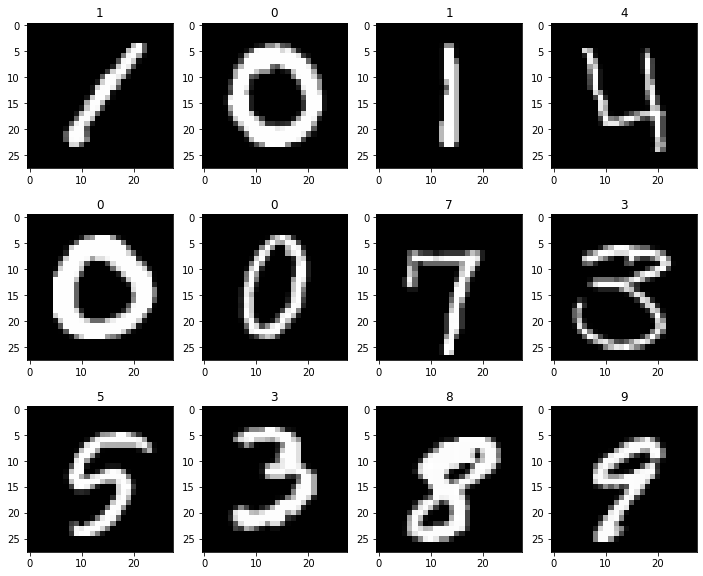

In [11]:
#lets take a look at the first few images along with the label
plt.figure(figsize = (12,10))
for i in range(12):
  plt.subplot(3,4, i + 1)
  plt.imshow(x_train[:12].reshape(12,28,28)[i], cmap='gray')
  plt.title(y_train[i])

###a. Briefly describe the elbow method and the silhouette method

Elbow Method : <br>
    - This is used to determine the number of clusters or the K value in K-Means Clustering.<br>
    - As K increases, each cluster will get closer to their corresponding ceteroids.<br>
    - Therefore average distortion would be decreased.<br>
    - At some point, distoring declines the most will be met. This point is called the elbow.<br>
    - K value related to that point is the optimal K value for the dataset.<br>




Silhouette Method:<br>
- This is also used to get the optimal k value.<br>
- Using this method, we can caluclate co-efficients of each point that are used to measure,
how a point is similar to its' cluster.
- These co-efficeints are called, silhouette co-efficients.
- Using these co-efficients we can find different clusters.

###b. Mention the criteria behind the way you define number of clusters
 - Using this method we can find the number of clusters.
 - From the start to the elbow point, the error decreases gradually.
 - After the elbow, the error does not increase with a significant amount(almost constant)
 - Therefore at the elbow point , we can take the k value as the number of
 clusters in the dataset.

Elbow Method can be used to find the number of clusters (k value)

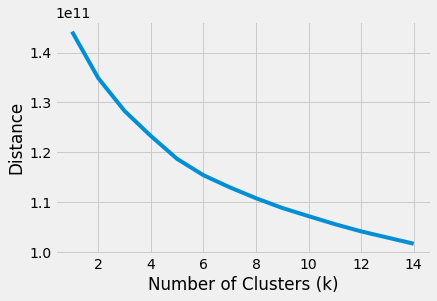

In [13]:
#Applying Elbow method for getting the number of clusters

#importing libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.style as style

#getting the average distance
range_n_clusters = [i for i in range(1,15)]
avg_distance=[]

#getting the list of average distances to be plotted
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, random_state=1).fit(x_train)
  avg_distance.append(clusterer.inertia_)

#plotting
style.use("fivethirtyeight")
plt.plot(range_n_clusters, avg_distance)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distance")
plt.show()

We can see the elbow bend at k = 10 , therefore we can get the idea that there are 10 clusters in the dataset. Let's choose that and  using K Means Classifier Method in sklearn.

K Means Clustering

In [14]:
#Using the KMeans Clustering
from sklearn.neighbors import KNeighborsClassifier

#making a model for the K Means Clustering 
KMeans_model = KNeighborsClassifier(n_neighbors=10)
KMeans_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

Classifer method correctly chooses the number of clusters. Now lets visualize the predictions of the K Means Model we created above.

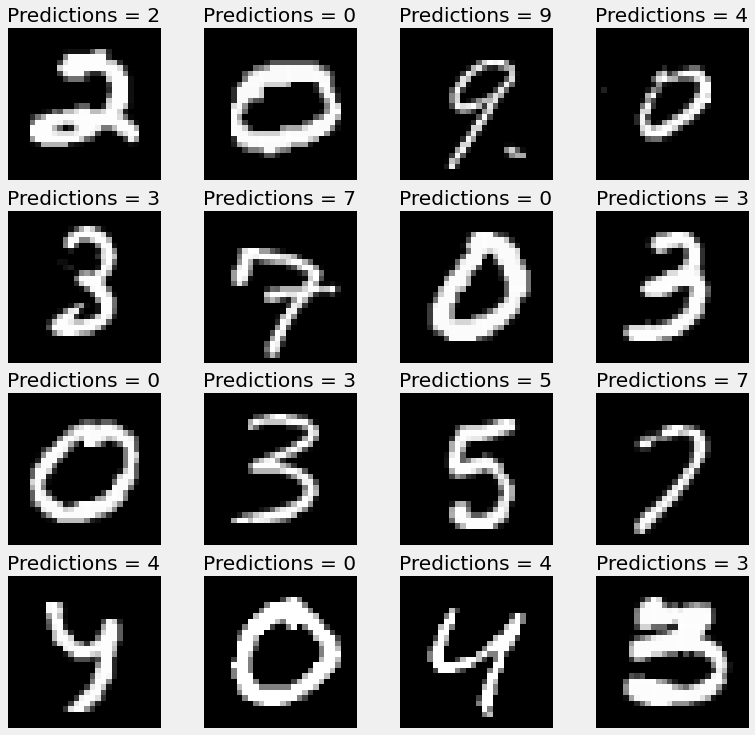

In [20]:
predictions = KMeans_model.predict(x_test[:16])
images = x_test[:16].reshape(16,28,28)
plt.figure(figsize = (12,12))
for i in range(16):
  plt.subplot(4,4, i + 1)
  plt.imshow(images[i], cmap='gray')
  plt.title("Predictions = "+ str(predictions[i]))
  plt.axis('off')

###c. Visualize each cluster and justify the reasons for misclusted images(eg:
5 is in 8’s cluster).


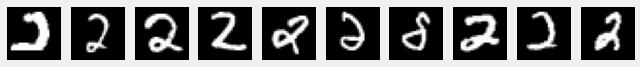

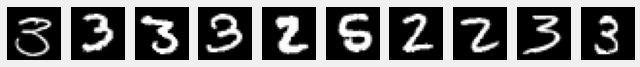

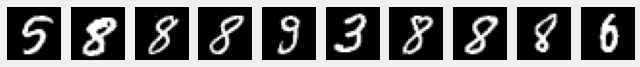

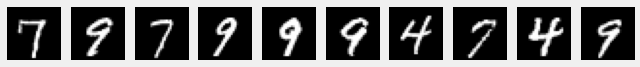

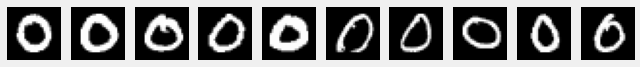

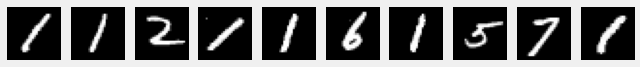

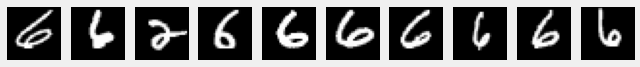

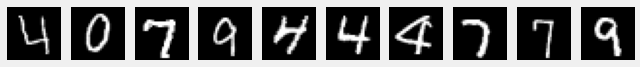

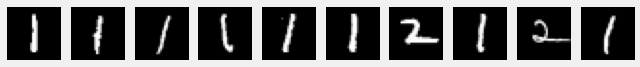

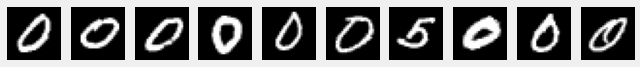

In [22]:
#making another model for clustring
KMeans_model_2 = KMeans(n_clusters=10, random_state=0).fit(x_train)

#getting the cluster
cluster_list = {i : np.where(KMeans_model_2.labels_ == i) for i in range(15)}

#visulazing each cluster
for i in range(10):
  plt.figure(figsize=(10,10))
  for j in range(min(10, len(cluster_list[i][0]))):
    plt.subplot(1,10,j+1)
    plt.imshow(x_train[cluster_list[i][0][j]].reshape(28,28), cmap='gray')
    plt.axis('off')

These misclassifications happens due to the similarity of the pixels of the misclassifed image with the classified cluster.
This can be see that in the last line where there is a 5 in between 0s. That 5 is very similar to 0, hence it is classified as 0.

###d. Suggest the ways to reduce the cluster errors.


There are many ways to reduce cluster errors. One of them is to reduce the overfitting and the other one is to data image augmentation. Data augmentation comes when we need to do some image processing techniques on the images and inputting them to the dataset as well.<br>

Another way to reduce cluster errors is to increase the data set size.